ChatGPT Reviews Analysis:
*What people think about ChatGPT?*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

Loading the data

In [2]:
data = pd.read_csv(r'chatgpt_reviews.csv')
data.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [3]:
data.shape

(196727, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [5]:
data['Review Date'] = pd.to_datetime(data['Review Date'])

In [6]:
data['Review Date']

0        2024-08-23 19:30:05
1        2024-08-23 19:28:18
2        2024-08-23 19:22:59
3        2024-08-23 19:20:50
4        2024-08-23 19:20:39
                 ...        
196722   2023-07-27 16:26:31
196723   2023-09-23 16:25:18
196724   2023-11-08 13:57:14
196725   2023-07-25 15:32:57
196726   2023-11-30 18:11:41
Name: Review Date, Length: 196727, dtype: datetime64[ns]

In [7]:
data.isnull().sum()
#Review column has 6 null values

Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64

Handling Missing Values

In [8]:
data['Review'] = data['Review'].fillna(' ')

In [9]:
data.isnull().sum()

Review Id      0
Review         0
Ratings        0
Review Date    0
dtype: int64

##### Sentiment Analysis

In [10]:
pip install textblob


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(review):
    sentiment = TextBlob(review).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Review'].apply(get_sentiment)

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment'>

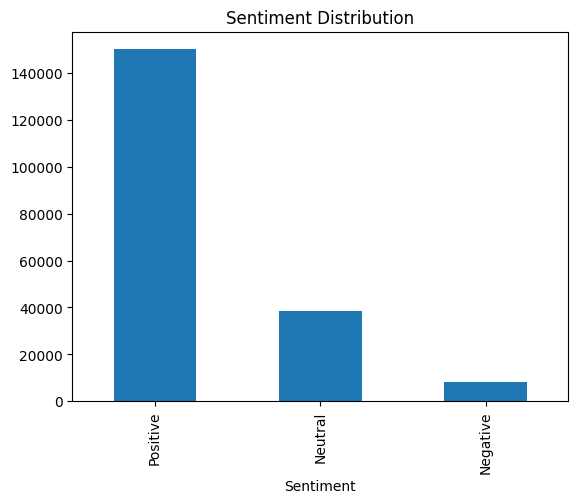

In [13]:
data['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

What users like about ChatGPT

In [14]:
positive_reviews = data[data['Sentiment']=='Positive']['Review']

In [15]:
vectorizer = CountVectorizer(ngram_range=(2,3), stop_words='english', max_features=100)
X = vectorizer.fit_transform(positive_reviews)

In [16]:
#sum the counts of each phrase
phrase_counts = X.sum(axis=0)
phrase_counts

matrix([[1134,  397, 1560,  236,  289,  342,  438,  320,  549,  247,
         1119,  465,  492,  810,  646,  326,  482,  424,  224,  797,
          267,  575,  222,  475,  281,  707,  235,  236,  550, 2491,
          579, 4913,  282,  229,  374,  500,  347,  519, 2672,  369,
          339,  329, 1150,  880,  257,  290,  727, 5886,  449,  260,
          352,  336,  265,  234,  271,  379,  283, 3130,  229,  299,
          258,  958,  277,  487,  454,  274,  289,  265,  227,  248,
          581, 1860,  454,  242,  304, 3327,  441,  227,  306,  271,
         1189,  224,  302, 1011,  260,  386,  306,  222,  237,  234,
          260,  558, 1219,  238,  544,  416,  363,  392,  288,  421]],
       dtype=int64)

In [17]:
phrases = vectorizer.get_feature_names_out()
phrases

array(['ai app', 'ai tool', 'amazing app', 'android app',
       'answer questions', 'answers questions', 'app amazing', 'app app',
       'app best', 'app gives', 'app good', 'app great', 'app help',
       'app helpful', 'app helps', 'app just', 'app like', 'app love',
       'app nice', 'app really', 'app seen', 'app students', 'app thanks',
       'app use', 'app used', 'app useful', 'app world', 'ask questions',
       'awesome app', 'best ai', 'best ai app', 'best app',
       'best application', 'best apps', 'best best', 'best friend',
       'best thing', 'better google', 'chat gpt', 'chatgpt app',
       'chatgpt best', 'don know', 'easy use', 'excellent app',
       'fantastic app', 'free version', 'good ai', 'good app',
       'good application', 'good apps', 'good experience', 'good helpful',
       'good job', 'good response', 'good use', 'good work', 'great ai',
       'great app', 'great experience', 'great tool', 'helped lot',
       'helpful app', 'helpful students', '

In [18]:
phrase_freq = [(phrases[i], phrase_counts[0, i]) for i in range(len(phrases))]
phrase_freq = sorted(phrase_freq, key = lambda x:x[1], reverse=True)

In [19]:
phrase_df = pd.DataFrame(phrase_freq, columns=['Phrase','Frequency'])

In [20]:
phrase_df.head()

,Phrase,Frequency
0,good app,5886
1,best app,4913
2,nice app,3327
3,great app,3130
4,chat gpt,2672


Text(0, 0.5, 'Phrases')

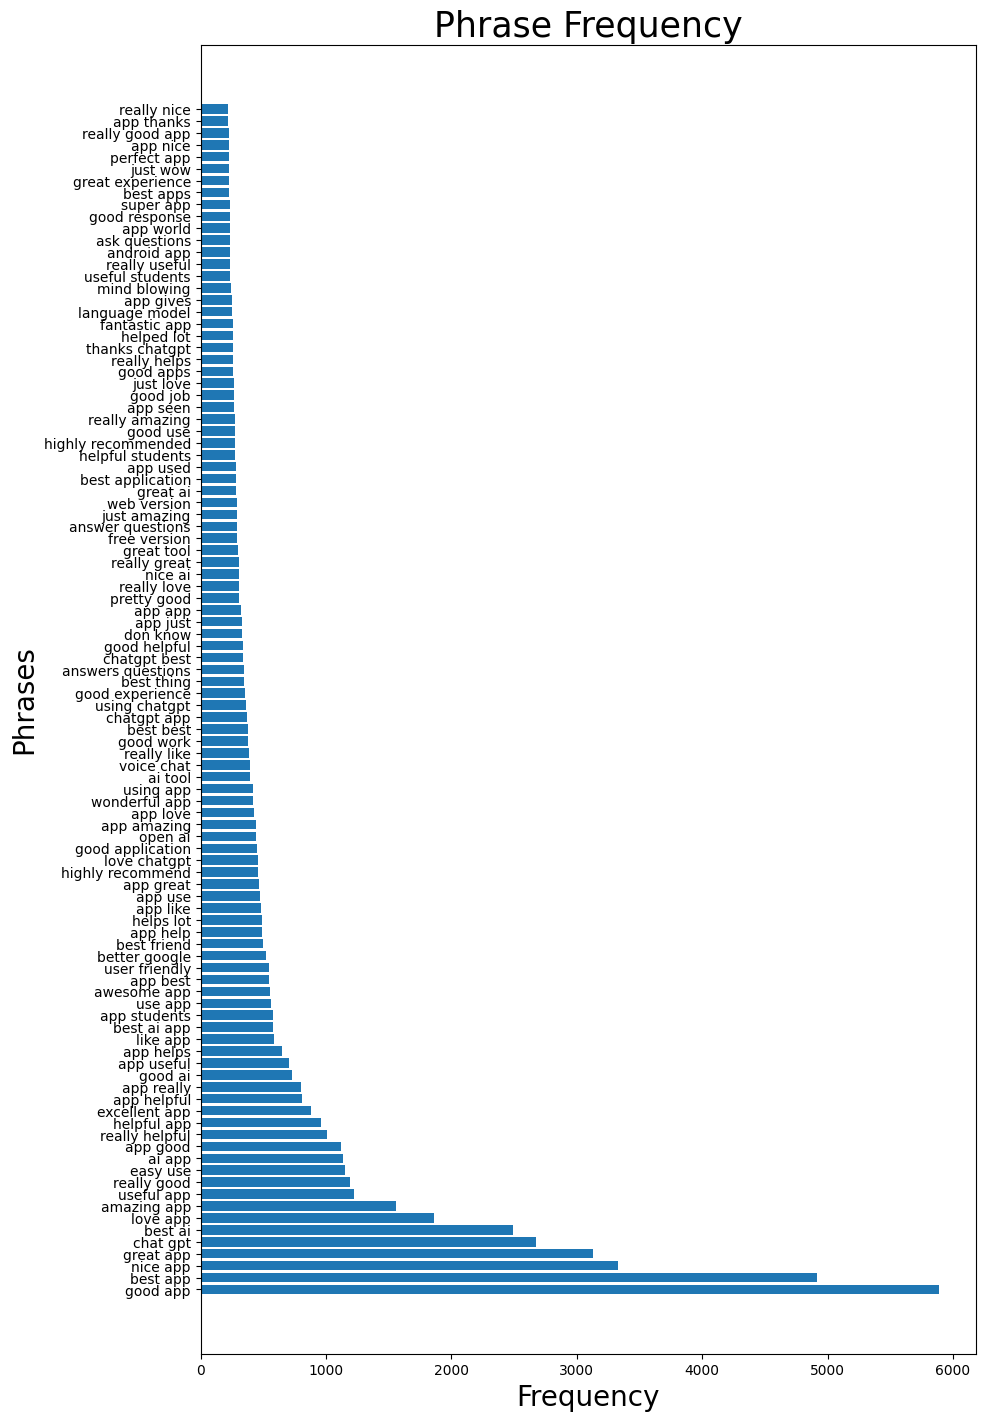

In [21]:
plt.figure(figsize=(10,17))
plt.barh(phrase_df['Phrase'], phrase_df['Frequency'])
plt.title("Phrase Frequency", fontsize=25)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Phrases', fontsize=20)

This plot shows people appreciate ChatGPT with phrases like 'excellent', 'great' etc. Also, they say ChatGPT is useful, helpful and easy to use

Now let's analyze what users don't like about ChatGPT

In [22]:
negative_reviews = data[data['Sentiment'] == 'Negative']['Review']

In [23]:
X_neg = vectorizer.fit_transform(negative_reviews)
phrase_counts_neg = X_neg.sum(axis=0)
phrases_neg = vectorizer.get_feature_names_out()
phrase_freq_neg = [(phrases_neg[i], phrase_counts_neg[0,i]) for i in range(len(phrases_neg))]

In [24]:
phrase_freq_neg = sorted(phrase_freq_neg, key=lambda x:x[1], reverse=True)

In [25]:
phrase_neg_df = pd.DataFrame(phrase_freq_neg, columns=['Phrase','Frequency'])

Text(0, 0.5, 'Phrases')

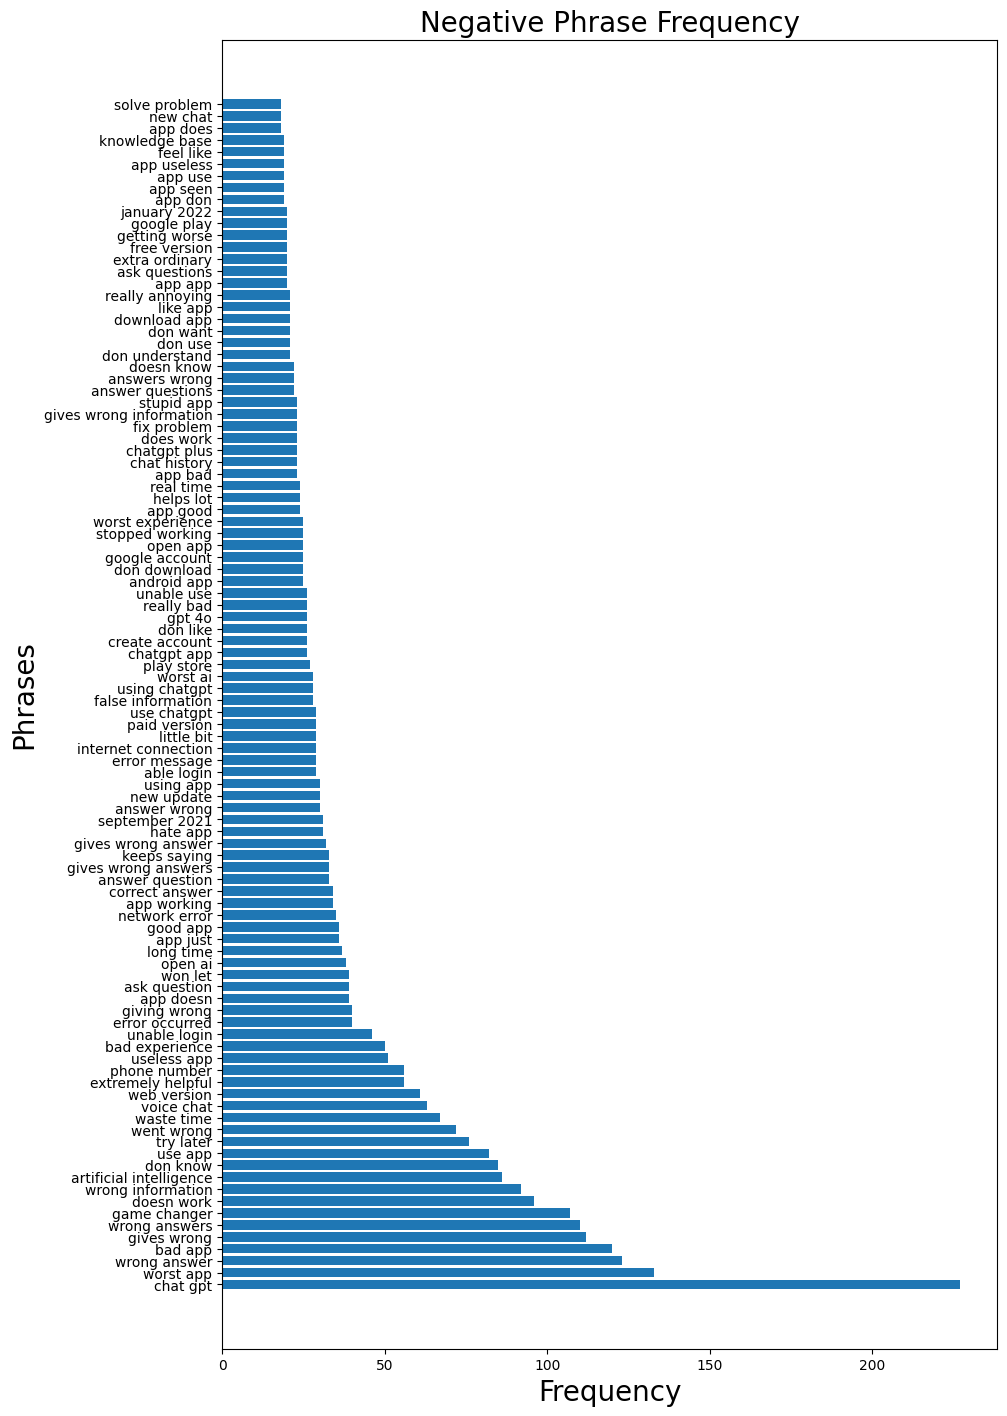

In [26]:
plt.figure(figsize=(10,17))
plt.barh(phrase_neg_df['Phrase'], phrase_neg_df['Frequency'])
plt.title('Negative Phrase Frequency', fontsize=20)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Phrases', fontsize=20)

We can see that people complain about ChatGPT as 'worst app', 'bad app'. Also, they think ChatGPT gives wrong information.

Now let's identify common problems users face when using ChatGPT.

In [32]:
problem_keywords = {
    'Incorrect Answers': ['wrong answer', 'gives wrong', 'incorrect', 'inaccurate', 'wrong', 'given wrong', 'wrong information'],
    'App Performance': ['slow', 'lag', 'crash', 'bug', 'freeze', 'loading', 'glitch', 'worst app', 'bad app', 'horrible', 'terrible', 'doesn work', 'waste time'],
    'User Interface': ['interface', 'UI', 'difficult to use', 'confusing', 'layout'],
    'Features Missing/Not Working': ['feature missing', 'not working', 'missing', 'broken', 'not available'],
    'Quality of Responses': ['bad response', 'useless', 'poor quality', 'irrelevant', 'nonsense', 'unable use']
}

In [33]:
problem_counts = {key: 0 for key in problem_keywords.keys()}
for phrase, count in phrase_freq_neg:
    for problem, keywords in problem_keywords.items():
        if any(keyword in phrase for keyword in keywords):
            problem_counts[problem] += count
            break
problem_df = pd.DataFrame(list(problem_counts.items()), columns=['Phrase','Frequency'])
problem_df

,Phrase,Frequency
0,Incorrect Answers,689
1,App Performance,416
2,User Interface,0
3,Features Missing/Not Working,0
4,Quality of Responses,96


Text(0, 0.5, 'Frequency')

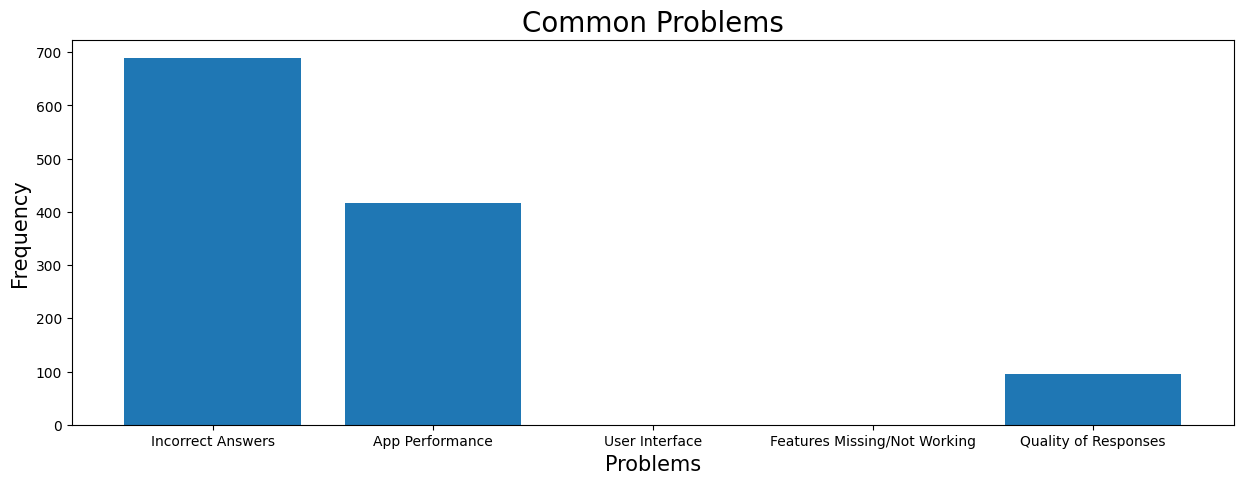

In [43]:
plt.figure(figsize=(15,5))
plt.bar(problem_df['Phrase'], problem_df['Frequency'])
plt.title('Common Problems', fontsize=20)
plt.xlabel('Problems', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Most people seem to complain about the incorrect answers provided by ChatGPT. Another significant issue is app performance and the quality of responses. These findings highlight the areas that require improvement.

Sentiment Analysis Over Time

In [52]:
sentiment_over_time = data.groupby([data['Review Date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

In [53]:
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

In [54]:
sentiment_over_time

Sentiment,Negative,Neutral,Positive
Review Date,,,
2023-07-01,479,1810,5994
2023-08-01,440,1439,4922
2023-09-01,389,1433,5771
2023-10-01,247,1169,4408
2023-11-01,394,1667,6658
2023-12-01,461,2048,7866
2024-01-01,457,1952,6904
2024-02-01,460,1715,6573
2024-03-01,659,3022,11494


Text(0, 0.5, 'Number of Reviews')

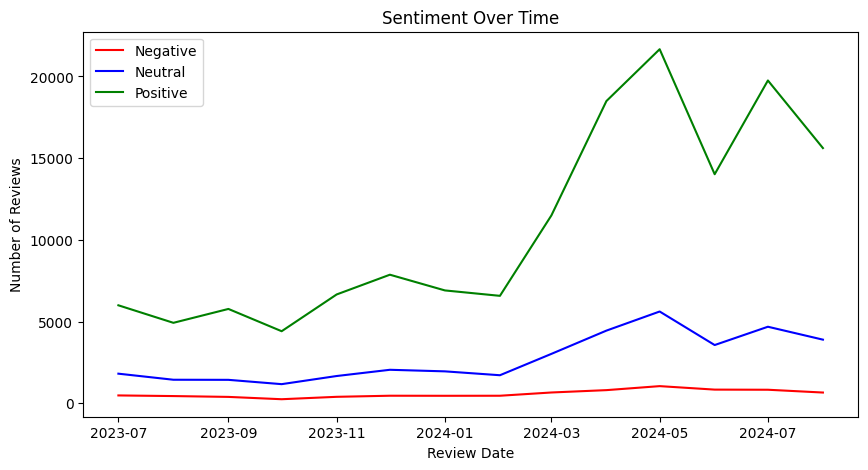

In [67]:
plt.figure(figsize=(10,5))
plt.plot(sentiment_over_time.index, sentiment_over_time['Negative'], 'r', label='Negative')
plt.plot(sentiment_over_time.index, sentiment_over_time['Neutral'], 'b', label = 'Neutral')
plt.plot(sentiment_over_time.index, sentiment_over_time['Positive'], 'g', label = 'Positive')
plt.legend()
plt.title('Sentiment Over Time')
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')

- The visualization shows that the number of positive reviews has increased over time since March 2024, peaking in May 2024 and slightly declining in July 2024.
- The number of negative reviews has remained relatively stable.
- The number of neutral reviews also has increased over time, peaking in May 2024.

Calculating Net Promoter Score(NPS)

In [68]:
data.head()

,Review Id,Review,Ratings,Review Date,Sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,Positive


In [70]:
data['NPS Category'] =  data['Ratings'].apply(lambda x: 'Promoter' if x == 5 else ('Passive' if x==4 else 'Detractor'))

In [86]:
nps_counts = data['NPS Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoter'] - nps_counts['Detractor']

In [87]:
nps_score

64.35313912172705

This Net Promoter Score(NPS) indicates that most users would recommend ChatGPT to others, the score above 50 is considered as great score.